In [254]:
import pandas as pd
df=pd.read_csv('all_seasons.csv')
df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,Joel Embiid,PHI,29,213.36,127.005760,Kansas,Cameroon,2014,1,3,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,John Butler Jr.,POR,20,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,John Collins,ATL,25,205.74,102.511792,Wake Forest,USA,2017,1,19,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,Jericho Sims,NYK,24,208.28,113.398000,Texas,USA,2021,2,58,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12844 non-null  object 
 1   team_abbreviation  12844 non-null  object 
 2   age                12844 non-null  int64  
 3   player_height      12844 non-null  float64
 4   player_weight      12844 non-null  float64
 5   college            12844 non-null  object 
 6   country            12844 non-null  object 
 7   draft_year         12844 non-null  object 
 8   draft_round        12844 non-null  object 
 9   draft_number       12844 non-null  object 
 10  gp                 12844 non-null  int64  
 11  pts                12844 non-null  float64
 12  reb                12844 non-null  float64
 13  ast                12844 non-null  float64
 14  net_rating         12844 non-null  float64
 15  oreb_pct           12844 non-null  float64
 16  dreb_pct           128

In [256]:
df.isnull().sum()

player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [257]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming df is already defined and read from 'data.csv'
# df = pd.read_csv('data.csv')

# Select multiple columns to stack
columns_to_stack = ['gp', 'pts', 'reb', 'net_rating', 'ts_pct', 'net_rating', 'ast_pct', 'age']

# Extract these columns as a 2D NumPy array
data_to_stack = df[columns_to_stack].to_numpy()

# Standardization using StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_to_stack)

# Apply PCA
n_components = 4
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(data_standardized)

# Convert the PCA result to a DataFrame
X = pd.DataFrame(X_pca, columns=[f'PCA {i+1}' for i in range(n_components)])
print(X)

# Extract the target variable
y = df['usg_pct'].to_numpy()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Verify the shapes of the split data
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


          PCA 1     PCA 2     PCA 3     PCA 4
0      0.264562  0.380113  0.722649 -1.578952
1      0.822315  2.292514 -0.418262  0.167787
2      0.156114 -0.825565 -0.478057  0.078284
3     -0.288905 -0.143887  0.312930  0.587398
4      1.654264 -0.365432 -0.869909 -0.452555
...         ...       ...       ...       ...
12839 -4.420308 -2.086314  0.563676 -0.010408
12840  2.833356 -0.026164 -0.838516 -1.202145
12841 -1.392419 -0.791279 -1.311929  0.051785
12842 -0.332588 -0.334212 -1.833260 -0.007769
12843 -0.108591 -0.351896 -0.088934  1.536899

[12844 rows x 4 columns]
x_train shape: (10275, 4)
x_test shape: (2569, 4)
y_train shape: (10275,)
y_test shape: (2569,)


In [258]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Transform the testing data using the same scaler
x_test_scaled = scaler.transform(x_test)

In [259]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True,copy_X=True)
model.fit(x_train_scaled,y_train)

LinearRegression()

In [260]:
y_pred=model.predict(x_test_scaled)
y_pred

array([0.16625611, 0.15479915, 0.18742266, ..., 0.18933936, 0.16211778,
       0.18238578])

In [261]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

result1 = r2_score(y_test,y_pred)
print("r2 Score :" ,result1)

result2= mean_absolute_error(y_test,y_pred)
print("MAE :" ,  result2)

result3= mean_squared_error(y_test,y_pred)
print("MSE :" , result3)

r2 Score : 0.3585584977449132
MAE : 0.03247202113738954
MSE : 0.001778003961324572


In [262]:
import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np

KeyboardInterrupt: 

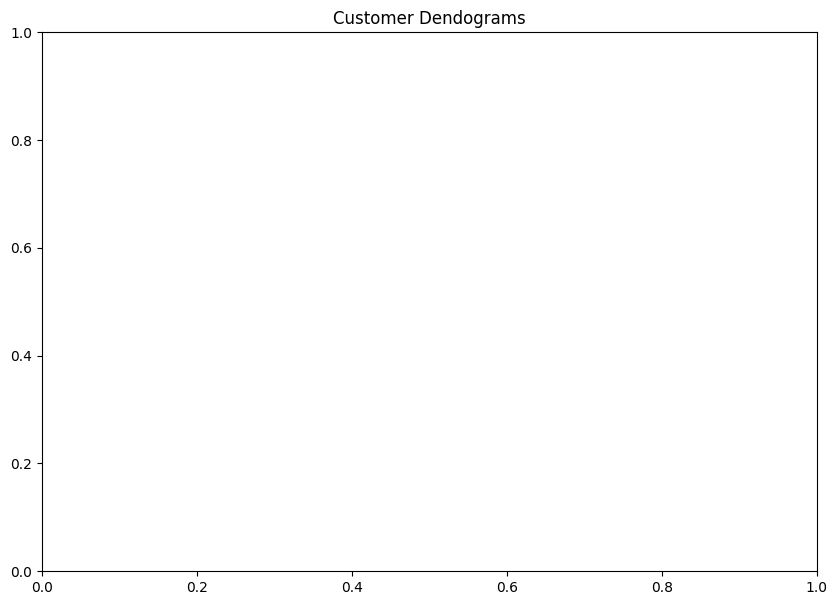

In [275]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='complete'))

max_d=7.08
plt.axhline(y=max_d,c="k")
plt.show()

In [264]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 1, ..., 1, 1, 1])

In [267]:
# Predicting using new data that has 4 features
new_data = np.array([[0, 0, 0, 0], [12, 3, 3, 3], [1, 0, 0, 0], [3, 2, 2, 2]])

# Make predictions
predictions = kmeans.predict(new_data)
print("Predictions:", predictions)


Predictions: [1 0 0 0]


C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [268]:
kmeans.cluster_centers_


array([[ 1.4008345 ,  0.46099823, -0.00458916, -0.07662402],
       [-1.0730165 , -0.35311717,  0.00351522,  0.05869276]])

In [270]:
identified_clusters=kmeans.fit_predict(X)
identified_clusters

C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 1, ..., 1, 1, 1])

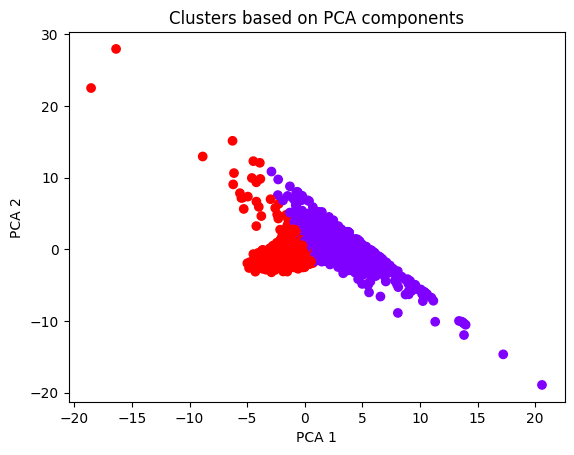

In [278]:
data_with_clusters = X.copy()
data_with_clusters['Clusters'] = kmeans.labels_

plt.scatter(data_with_clusters['PCA 1'], data_with_clusters['PCA 2'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters based on PCA components')
plt.show()

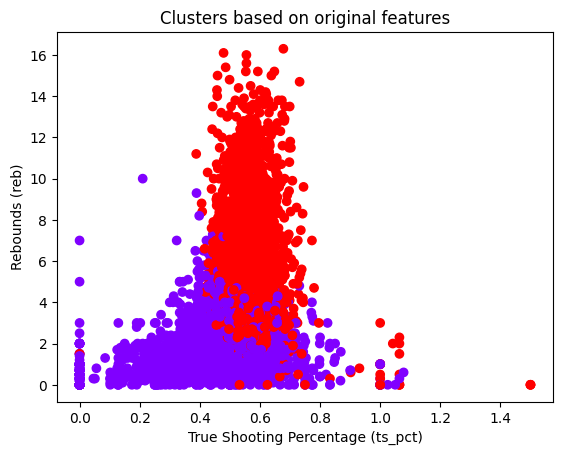

In [279]:
df['Clusters'] = kmeans.labels_

plt.scatter(df['ts_pct'], df['reb'], c=df['Clusters'], cmap='rainbow')
plt.xlabel('True Shooting Percentage (ts_pct)')
plt.ylabel('Rebounds (reb)')
plt.title('Clusters based on original features')
plt.show()